In [4]:
import plotly.graph_objects as go
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [6]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

In [7]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


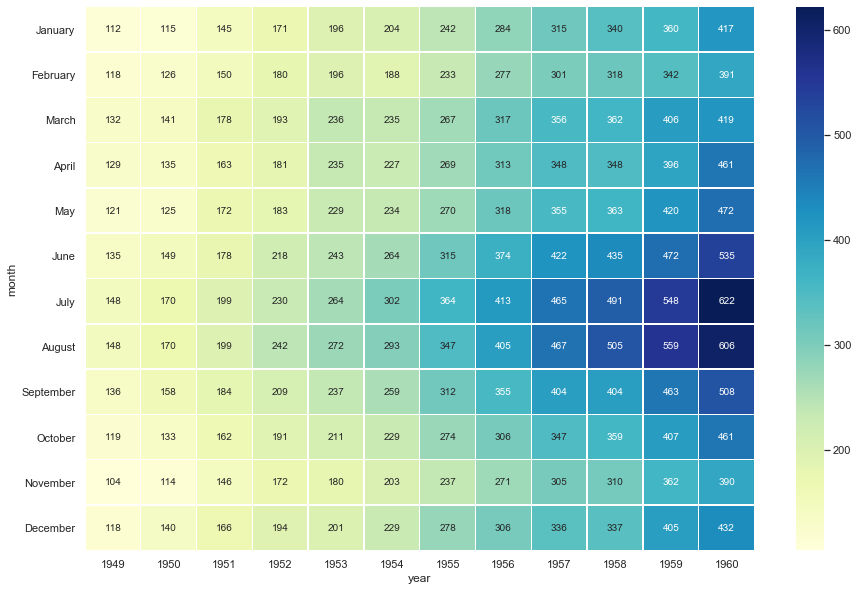

In [8]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(flights,annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

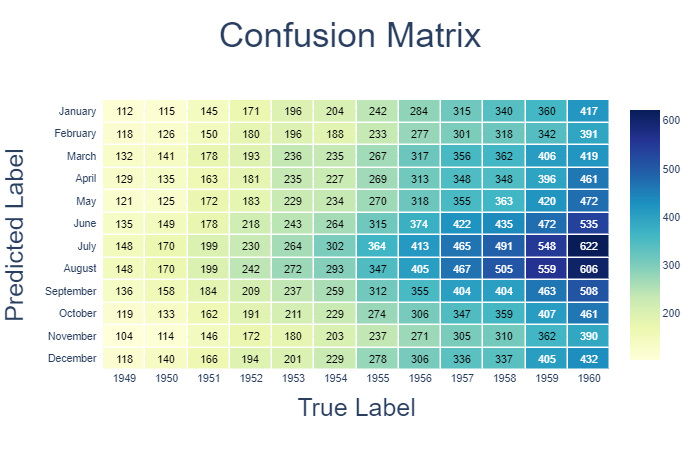

In [85]:
#why can i set heatmap template to simple white in layout but not in create call
import plotly.figure_factory as ff

x = list(flights.columns.values)
y = flights.index.values
z=flights.values

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, 
                                  colorscale='YlGnBu',
                                  xgap=1.5, ygap=1.5,
                                  showscale = True,)

fig.update_layout(font=dict(
                  family="Arial", size=10.5,),
                  title=dict(text = "Confusion Matrix", x = 0.5, y = .95, font = dict(size=35)),
                  autosize=False, width=900, height=700,
                  showlegend=False, template = "plotly_white",
                  xaxis_title=dict(text ="True Label", font = dict(size = 25)),
                  yaxis_title=dict(text ="Predicted Label", font = dict(size = 25)))

fig.update_yaxes(autorange="reversed")
fig.update_xaxes(showgrid=False, side="bottom")
fig.show(renderer = "png")